## LAB 2 - CRC
- **Nome:** Wendell Tomé Marinho OLiveira
- **Matrícula:** 122110748


## Parte 2: Implementação Manual do Algoritmo CRC


In [1]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1
    
    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela 
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)
            
            # Atualize a mensagem com o resultado do XOR.
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j + 1] = resultado_xor[j]
    
    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        inicio = i
        fim = i + len(gerador_bits)
        
        if mensagem_aumentada[i] == '1' and fim <= len(mensagem_aumentada):            
            
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

### Comparação com RCNA_05

In [2]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


### Resultado está condizente com o que foi apresentado no slide:

![slide_na05_48](images/slide_na05_48.png)


## Parte 3: Análise Comparativa de Desempenho

In [3]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        inicio = i
        fim = i + len(gerador_bits)
        
        if mensagem_aumentada[i] == '1' and fim <= len(mensagem_aumentada):            
            
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.18606738800008316, 'mem_pico_manual': 107.2353515625, 'tempo_lib': 0.046268665999377845, 'mem_pico_lib': 1.703125}, {'tamanho': 3000, 'tempo_manual': 0.36637220100237755, 'mem_pico_manual': 211.2197265625, 'tempo_lib': 0.09099242299998878, 'mem_pico_lib': 1.21875}, {'tamanho': 6000, 'tempo_manual': 0.5844711790014117, 'mem_pico_manual': 422.1806640625, 'tempo_lib': 0.17705782199845999, 'mem_pico_lib': 1.21875}, {'tamanho': 16000, 'tempo_manual': 1.5389006219993462, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.46412248499837006, 'mem_pico_lib': 1.21875}]


### Máquina:

#### Instalar Biblioteca Para ver Infos da Minha Máquina

In [4]:
!pip install py-cpuinfo

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import platform
import cpuinfo
import psutil


# Informações básicas
print("===== INFORMAÇÕES DO SISTEMA =====")
print(f"Arquitetura: {platform.machine()}")
print(f"Processador: {cpuinfo.get_cpu_info()['brand_raw']}")
print(f"Núcleos (físicos): {psutil.cpu_count(logical=False)}")
print(f"Núcleos (lógicos): {psutil.cpu_count(logical=True)}")
print(f"Frequência da CPU: {psutil.cpu_freq().max:.2f} MHz")

# Memória RAM
mem = psutil.virtual_memory()
print(f"Memória Total: {mem.total / (1024**3):.2f} GB")

### Output 
# ===== INFORMAÇÕES DO SISTEMA =====
# Arquitetura: x86_64
# Processador: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz
# Núcleos (físicos): 4
# Núcleos (lógicos): 8
# Frequência da CPU: 4000.00 MHz
# Memória Total: 31.10 GB

===== INFORMAÇÕES DO SISTEMA =====
Arquitetura: x86_64
Processador: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz
Núcleos (físicos): 4
Núcleos (lógicos): 8
Frequência da CPU: 4200.00 MHz
Memória Total: 15.41 GB


### Plot Gráfico

#### Gráfico 1: Tamanho da Mensagem (x) x Tempo de Execução (y)

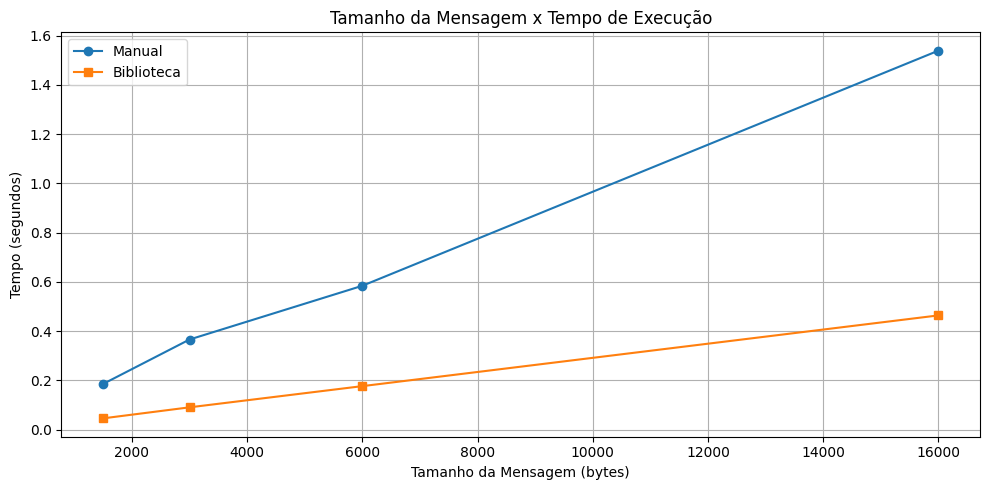

In [6]:
import matplotlib.pyplot as plt

# Extrair dados
tamanhos = [r['tamanho'] for r in resultados]

tempos_manual = [r['tempo_manual'] for r in resultados]
tempos_lib = [r['tempo_lib'] for r in resultados]

# Gráfico 1: Tempo de Execução
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, tempos_manual, marker='o', label='Manual')
plt.plot(tamanhos, tempos_lib, marker='s', label='Biblioteca')
plt.title('Tamanho da Mensagem x Tempo de Execução')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Tempo (segundos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Gráfico 2: Tamanho da Mensagem (x) x Pico de Memória (y)

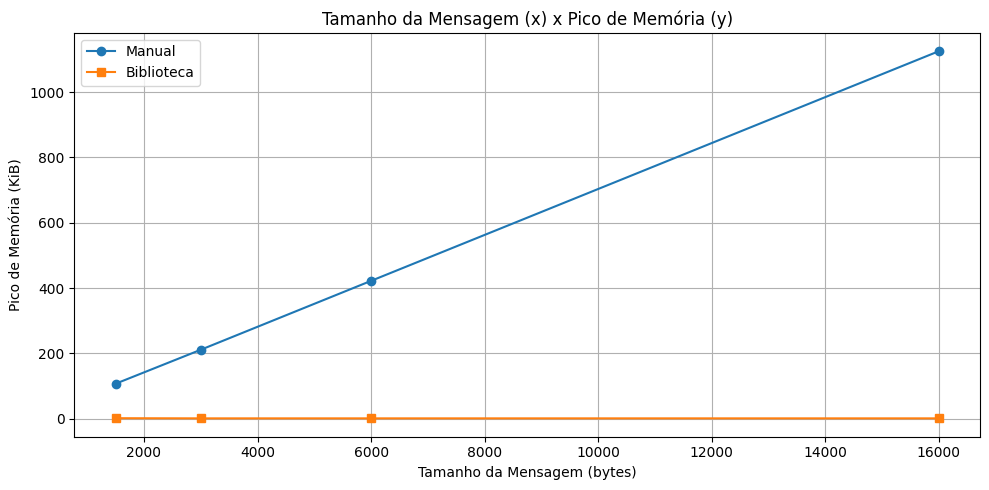

In [7]:
mem_manual = [r['mem_pico_manual'] for r in resultados]
mem_lib = [r['mem_pico_lib'] for r in resultados]

plt.figure(figsize=(10, 5))
plt.plot(tamanhos, mem_manual, marker='o', label='Manual')
plt.plot(tamanhos, mem_lib, marker='s', label='Biblioteca')
plt.title('Tamanho da Mensagem (x) x Pico de Memória (y)')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Pico de Memória (KiB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Análise Investigativa da Detecção de Erros (Cenário Personalizado)

### Parte 4.1 - Preparação do Cenário

> ⚠️ **Prencha a planilha**

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   wendell tome marinho oliveira   |
| `MENSAGEM_BASE`       |   0111011101100101011011100110010001100101011011000110110000100000011101000110111101101101011001010010000001101101011000010111001001101001011011100110100001101111001000000110111101101100011010010111011001100101011010010111001001100001 |
| `CRC`                 |   10001000000100001   |

In [8]:
# Nome: wendell tome marinho oliveira
MENSAGEM = "wendell tome marinho oliveira"

## (Coloquei em minúsculo e retirei o ´)
## Em Binário: 
# 01110111 01100101 01101110 01100100 01100101 
# 01101100 01101100 00100000 01110100 01101111 
# 01101101 01100101 00100000 01101101 01100001 
# 01110010 01101001 01101110 01101000 01101111 
# 00100000 01101111 01101100 01101001 01110110 
# 01100101 01101001 01110010 01100001 
# Esse foi o binário utilizando o site
MENSAGEM_BASE = "0111011101100101011011100110010001100101011011000110110000100000011101000110111101101101011001010010000001101101011000010111001001101001011011100110100001101111001000000110111101101100011010010111011001100101011010010111001001100001"

# Usando ecode e juntando os bytes
MENSAGEM_BASE_BINARY = ''.join(format(byte, '08b') for byte in MENSAGEM.encode('utf-8'))

assert MENSAGEM_BASE == MENSAGEM_BASE_BINARY

# Matricula: 122110748
## Final 8, 9: CRC-16/CCITT-FALSE (10001000000100001 ou x^16 + x^12 + x^5 + 1) -> 10001000000100001
CRC_MATRICULA = "10001000000100001"


### Parte 4.2 - Caça Aos Erros

#### A. Declarando novamente a função manual

In [9]:
# __ Colocando aqui novamente minha função manual __

def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        inicio = i
        fim = i + len(gerador_bits)
        
        if mensagem_aumentada[i] == '1' and fim <= len(mensagem_aumentada):            
            
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
            # ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

## __ fim da função manual __

#### B. Calculando CRC da MENSAGEM BASE

Observação Importante:
- O cálculo do CRC com a mensagem original no cálculo manual estava inconsistente com o cálculo do algoritmo. (Achei estranho tudo apresentando errado, decidi investigar)
- Isso decorre pois o meu valor inicial é considerado como 0x0000 (que é 0), porém o valor inicial do algoritmo é 0xFFFF 
- Sei que essa etapa devemos testar o nosso algorimo acerca de erros, porém a inconsistência estava desde o caso base (onde não foi inserido erro)
- A fonte vai do próprio algoritmo de CRC16 que mostra o seu init value que é 0xFFFF. [link](https://gist.github.com/tijnkooijmans/10981093)
- Por isso, a solução é considerar nosso caso base como 0xFFFFF! Por isso é necessário o pré processamento a seguir


In [10]:
r = len(CRC_MATRICULA) - 1

# Pré Processamento considerando o caso base como 0xFFFF
init_val_bits = format(0xFFFF, f'0{r}b') # '1111111111111111'
primeiros_r_bits = MENSAGEM_BASE_BINARY[:r]
resto_da_mensagem = MENSAGEM_BASE_BINARY[r:]

primeiros_r_bits_modificados = xor_bits(primeiros_r_bits, init_val_bits)

MENSAGEM_CORRIGIDA_CASO_BASE = primeiros_r_bits_modificados + resto_da_mensagem

crc_mensagem = calcular_crc_manual(MENSAGEM_CORRIGIDA_CASO_BASE, CRC_MATRICULA)
crc_mensagem

'1000100101010100'

#### C. Verificando Caso Base c/ CCR16 CCITT_FALSE

In [11]:
# Utilizando a biblioteca crccheck para usar o Crc16 CCITT_FALSE
!pip install crccheck

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from crccheck.crc import Crc16CcittFalse

crc_ref = Crc16CcittFalse.calc(MENSAGEM.encode("utf-8"))

crc_mensagem_int = int(crc_mensagem, 2)
assert crc_mensagem_int == crc_ref, f"CRC Não é Igual: {crc_mensagem_int:#04x} != {crc_ref:#04x}"
print("CRC É Igual!")


CRC É Igual!


#### D. Formatando Quadro Transmitido

In [13]:
quadro_transmitido = MENSAGEM_BASE_BINARY + crc_mensagem
quadro_transmitido

'01110111011001010110111001100100011001010110110001101100001000000111010001101111011011010110010100100000011011010110000101110010011010010110111001101000011011110010000001101111011011000110100101110110011001010110100101110010011000011000100101010100'

#### E. Implementação dos 10 testes de erro

In [14]:
import random
resultados_testes = []

for teste in range(10):
    # Só para garantir que não vai pegar só quando erro é 0
    tamanho_erro = 0
    while tamanho_erro == 0:
        posicao_erro_start = random.randint(0, len(quadro_transmitido) - 1)
        posicao_erro_end = random.randint(posicao_erro_start, len(quadro_transmitido))
        tamanho_erro = posicao_erro_end - posicao_erro_start        

    # Criar padrão de erro com 1s na região sorteada
    padrao_erro = ['0'] * len(quadro_transmitido)
    for i in range(posicao_erro_start, min(posicao_erro_start + tamanho_erro, len(quadro_transmitido))):
        padrao_erro[i] = '1'
    padrao_erro_bits = ''.join(padrao_erro)

    # Gerar quadro corrompido fazendo a inversão
    quadro_corrompido = xor_bits(quadro_transmitido, padrao_erro_bits)
    dados_corrompidos = quadro_corrompido[:-r]

    # Ajuste com XOR de 0xFFFF (Igual no pré processamento)
    primeiros_r_bits_corrompidos = xor_bits(dados_corrompidos[:r], init_val_bits)
    dados_corrompidos_ajustado = primeiros_r_bits_corrompidos + dados_corrompidos[r:]

    # CRC Manual
    crc_manual_result = calcular_crc_manual(dados_corrompidos_ajustado, CRC_MATRICULA)
    erro_detectado_manual = crc_manual_result != '0' * r

    # CRC da biblioteca (crccheck)
    quadro_corrompido_bytes = int(quadro_corrompido, 2).to_bytes((len(quadro_corrompido) + 7) // 8, 'big')
    crc_lib_result = Crc16CcittFalse.calc(quadro_corrompido_bytes)
    erro_detectado_biblioteca = crc_lib_result != 0

    resultados_testes.append({
        "teste": teste + 1,
        "posicao_erro_start": posicao_erro_start,
        "posicao_erro_end": posicao_erro_end,
        "tamanho_erro": tamanho_erro,
        "padrao_erro": padrao_erro_bits[posicao_erro_start:posicao_erro_start + tamanho_erro],
        "erro_detectado_manual": erro_detectado_manual,
        "erro_detectado_biblioteca": erro_detectado_biblioteca,
        "falha_na_deteccao": not (erro_detectado_manual and erro_detectado_biblioteca)
    })

resultados_testes

[{'teste': 1,
  'posicao_erro_start': 211,
  'posicao_erro_end': 217,
  'tamanho_erro': 6,
  'padrao_erro': '111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 2,
  'posicao_erro_start': 109,
  'posicao_erro_end': 164,
  'tamanho_erro': 55,
  'padrao_erro': '1111111111111111111111111111111111111111111111111111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 3,
  'posicao_erro_start': 1,
  'posicao_erro_end': 135,
  'tamanho_erro': 134,
  'padrao_erro': '11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 4,
  'posicao_erro_start': 60,
  'posicao_erro_end': 215,
  'tamanho_erro': 155,
  'padrao_erro': '1111111111111111111111111111111111111111111111111111111

In [15]:
print("\n--- Resultados dos 10 Testes ---\n")
for resultado in resultados_testes:
    print(f"Teste {resultado['teste']}:")
    print(f"    Posição do erro: {resultado['posicao_erro_start']} até {resultado['posicao_erro_end'] - 1} (tamanho: {resultado['tamanho_erro']} bits)")
    print(f"    Padrão de erro:  {resultado['padrao_erro']}")
    print(f"    Detectado pela implementação manual?     {'SIM' if resultado['erro_detectado_manual'] else '❌ NÃO'}")
    print(f"    Detectado pela biblioteca (crccheck)?    {'SIM' if resultado['erro_detectado_biblioteca'] else '❌ Não'}")
    
    if resultado['falha_na_deteccao']:
        print("   ⚠️  ERRO **NÃO DETECTADO** por alguma das implementações!\n")
    else:
        print("   ✅  Erro detectado corretamente por ambas.\n")



--- Resultados dos 10 Testes ---

Teste 1:
    Posição do erro: 211 até 216 (tamanho: 6 bits)
    Padrão de erro:  111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 2:
    Posição do erro: 109 até 163 (tamanho: 55 bits)
    Padrão de erro:  1111111111111111111111111111111111111111111111111111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 3:
    Posição do erro: 1 até 134 (tamanho: 134 bits)
    Padrão de erro:  11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 4:
    Posição do erro: 60 até 214 (tamanho: 155 bits)
    Padrão de erro:  111111111

##### Todos erros foram detectados por ambos algoritmos, assim vou tentar uma estratégia melhor mais robusta.

- Estratégia: 
    - Gerar um Padrão de Erro Aleatório que seja maior que 16 bits, a cada iteração ele aumenta mais 17 nos bits
    - Colocar um padrão especifico com teste == 6


In [ ]:
for teste in range(10):
    tamanho_erro = 17 + (17 * teste)

    if teste == 6:
        # Esse padrão é a representação exata do polinômio do CRC-16-CCITT
        padrao_especifico = '10001000000100001'
        tamanho_erro = 17
    else:
        padrao_especifico = '0' * tamanho_erro
        while int(padrao_especifico, 2) == 0:
            padrao_especifico = ''.join(random.choice(['0', '1']) for _ in range(tamanho_erro))

    posicao_erro_start = random.randint(0, len(quadro_transmitido) - tamanho_erro)
    posicao_erro_end = posicao_erro_start + tamanho_erro
    
    mascara_erro_lista = ['0'] * len(quadro_transmitido)
    mascara_erro_lista[posicao_erro_start:posicao_erro_end] = list(padrao_especifico)
    padrao_erro_bits = "".join(mascara_erro_lista)

    # Gerar quadro corrompido fazendo a inversão
    quadro_corrompido = xor_bits(quadro_transmitido, padrao_erro_bits)
    dados_corrompidos = quadro_corrompido[:-r]

    primeiros_r_bits_corrompidos = xor_bits(dados_corrompidos[:r], init_val_bits)
    dados_corrompidos_ajustado = primeiros_r_bits_corrompidos + dados_corrompidos[r:]

    crc_manual_result = calcular_crc_manual(dados_corrompidos_ajustado, CRC_MATRICULA)
    erro_detectado_manual = crc_manual_result != '0' * r

    quadro_corrompido_bytes = int(quadro_corrompido, 2).to_bytes((len(quadro_corrompido) + 7) // 8, 'big')
    crc_lib_result = Crc16CcittFalse.calc(quadro_corrompido_bytes)
    erro_detectado_biblioteca = crc_lib_result != 0

    resultados_testes.append({
        "teste": teste + 1,
        "posicao_erro_start": posicao_erro_start,
        "posicao_erro_end": posicao_erro_end,
        "tamanho_erro": tamanho_erro,
        "padrao_erro": padrao_especifico,
        "erro_detectado_manual": erro_detectado_manual,
        "erro_detectado_biblioteca": erro_detectado_biblioteca,
        "falha_na_deteccao": not (erro_detectado_manual and erro_detectado_biblioteca)
    })

resultados_testes

[{'teste': 1,
  'posicao_erro_start': 211,
  'posicao_erro_end': 217,
  'tamanho_erro': 6,
  'padrao_erro': '111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 2,
  'posicao_erro_start': 109,
  'posicao_erro_end': 164,
  'tamanho_erro': 55,
  'padrao_erro': '1111111111111111111111111111111111111111111111111111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 3,
  'posicao_erro_start': 1,
  'posicao_erro_end': 135,
  'tamanho_erro': 134,
  'padrao_erro': '11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111',
  'erro_detectado_manual': True,
  'erro_detectado_biblioteca': True,
  'falha_na_deteccao': False},
 {'teste': 4,
  'posicao_erro_start': 60,
  'posicao_erro_end': 215,
  'tamanho_erro': 155,
  'padrao_erro': '1111111111111111111111111111111111111111111111111111111

In [17]:
print("\n--- Resultados dos 10 Testes ---\n")
for resultado in resultados_testes:
    print(f"Teste {resultado['teste']}:")
    print(f"    Posição do erro: {resultado['posicao_erro_start']} até {resultado['posicao_erro_end'] - 1} (tamanho: {resultado['tamanho_erro']} bits)")
    print(f"    Padrão de erro:  {resultado['padrao_erro']}")
    print(f"    Detectado pela implementação manual?     {'SIM' if resultado['erro_detectado_manual'] else '❌ NÃO'}")
    print(f"    Detectado pela biblioteca (crccheck)?    {'SIM' if resultado['erro_detectado_biblioteca'] else '❌ Não'}")
    
    if resultado['falha_na_deteccao']:
        print("   ⚠️  ERRO **NÃO DETECTADO** por alguma das implementações!\n")
    else:
        print("   ✅  Erro detectado corretamente por ambas.\n")



--- Resultados dos 10 Testes ---

Teste 1:
    Posição do erro: 211 até 216 (tamanho: 6 bits)
    Padrão de erro:  111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 2:
    Posição do erro: 109 até 163 (tamanho: 55 bits)
    Padrão de erro:  1111111111111111111111111111111111111111111111111111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 3:
    Posição do erro: 1 até 134 (tamanho: 134 bits)
    Padrão de erro:  11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
    Detectado pela implementação manual?     SIM
    Detectado pela biblioteca (crccheck)?    SIM
   ✅  Erro detectado corretamente por ambas.

Teste 4:
    Posição do erro: 60 até 214 (tamanho: 155 bits)
    Padrão de erro:  111111111

#### OPCIONAL - Salvar Resultados Testes em CSV

In [18]:
import pandas as pd

df_resultados = pd.DataFrame(resultados_testes)
df_resultados.to_csv("resultados_crc_testes.csv", index=False, encoding='utf-8')

## Conclusão

### Ponto Cego

Os resultados mostrados foram muitos robustos, tentei executar mais de uma vez com diferentes estratégias de inserção de bit de erro.

A priori, a estratégia de sortear aleatório um tamanho de `n` bit para inverter os bits em uma determinada posi aleatória não deu certo.

Após isso, tentei ir aumentando gradativamente um número `n * 17` bits a cada iteração e após isso sortear os bits (0 ou 1) que iriam aparecer nesse tamanho. Porém, essa estratégia também não demonstrou resultado.

Por fim, apenas uma delas conseguiu produzir um erro no algoritmo de cálculo manual, que foi quando o padrão `10001000000100001` de 17 bits foi inserido. Esse padrão não é um erro qualquer, ele é a representação binária do polinômio gerador do CRC-16-CCITT: $x^{16} + x^{12} + x^5 + 1$.

Teoricamente, qualquer erro que seja um múltiplo do polinômio gerador resulturá em um resto de divisão igual a zero, tornando o erro "invisível" para o algoritmo. Como o erro inserido era o próprio polinômio gerador, o resto da divisão do quadro corrompdo foi 0.

Porém, surge a dúvida **por que a biblioteca detectou o erro e a implementação manual não**?

A diferença não está no cálculo da divisão polinomial, mas sim nos parâmetros adicionais que definem um padrão CRC completo. Muitas especificações, assim como a que foi usada, incluem etapas extras para aumentar a segurança. 

### Reflexões

O experimento mostra que, embora o CRC seja altamente eficaz, sua capacidade de detecção de erros depende não apenas do algoritmo, mas também dos detalhes da implementação.

Além disso, ele reforça um ponto importante: nenhum CRC é infalível. Ele falha ao detectar certos padrões, especialmente aqueles relacionados diretamente ao polinômio gerador. Porém é importante salientar que esses “pontos cegos” não são facilmente encontrados ao acaso.

Neste sentido, a diferença entre a implementação manual e a da biblioteca não representa erro de lógica, mas sim diferença de configuração. Ambas são corretas dentro do seu escopo, mas não são diretamente comparáveis sem considerar todos os parâmetros do algoritmo completo.

